
# EDA - Index Funds and Macro Indicators
___________________________

Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Data set

In [2]:
df= pd.read_excel('../df_SPY_VBMFX_Macro_Signals.xlsx',index_col=0,sheet_name='Sheet1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 390 entries, 1993-04-30 to 2025-09-30
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SPY                        390 non-null    float64
 1   SPY_mom                    390 non-null    float64
 2   SPY_3m                     390 non-null    float64
 3   SPY_3m_ann                 390 non-null    float64
 4   SPY_3m_sd                  390 non-null    float64
 5   SPY_3m_ann_sd              390 non-null    float64
 6   SPY_ln_3m                  390 non-null    float64
 7   SPY_ann_ln_3m              390 non-null    float64
 8   VBMFX                      390 non-null    float64
 9   VBMFX_mom                  390 non-null    float64
 10  VBMFX_3m                   390 non-null    float64
 11  VBMFX_3m_ann               390 non-null    float64
 12  VBMFX_3m_sd                390 non-null    float64
 13  VBMFX_3m_ann_sd            390 

In [4]:
df.head(3)

,SPY,SPY_mom,SPY_3m,SPY_3m_ann,SPY_3m_sd,SPY_3m_ann_sd,SPY_ln_3m,SPY_ann_ln_3m,VBMFX,VBMFX_mom,...,Slope_10Y_FF_Delta3m,AAA_minus_10Y,AAA_minus_10Y_Delta1m,AAA_minus_10Y_Delta3m,BAA_minus_10Y,BAA_minus_10Y_Delta1m,BAA_minus_10Y_Delta3m,BAA_minus_AAA,BAA_minus_AAA_Delta1m,BAA_minus_AAA_Delta3m
1993-04-30,24.479979,-0.025588,0.006866,0.027747,0.025016,0.050032,-0.025921,0.027369,2.488272,0.007439,...,-0.33,1.36,-0.24,-0.05,2.12,-0.06,0.01,0.76,0.18,0.06
1993-05-31,25.140205,0.026970,0.023106,0.095677,0.029115,0.058229,0.026613,0.091373,2.491764,0.001403,...,0.29,1.30,-0.06,-0.28,2.10,-0.02,-0.10,0.80,0.04,0.18
1993-06-30,25.230877,0.003607,0.004301,0.017316,0.026333,0.052666,0.003600,0.017168,2.536777,0.018065,...,-0.32,1.44,0.14,-0.16,2.16,0.06,-0.02,0.72,-0.08,0.14


In [5]:
df.tail(3)

,SPY,SPY_mom,SPY_3m,SPY_3m_ann,SPY_3m_sd,SPY_3m_ann_sd,SPY_ln_3m,SPY_ann_ln_3m,VBMFX,VBMFX_mom,...,Slope_10Y_FF_Delta3m,AAA_minus_10Y,AAA_minus_10Y_Delta1m,AAA_minus_10Y_Delta3m,BAA_minus_10Y,BAA_minus_10Y_Delta1m,BAA_minus_10Y_Delta3m,BAA_minus_AAA,BAA_minus_AAA_Delta1m,BAA_minus_AAA_Delta3m
2025-07-31,630.332458,0.023032,0.143197,0.707987,0.020495,0.040991,0.022770,0.535316,9.558923,-0.002986,...,0.20,1.04,-0.06,-0.17,1.67,-0.08,-0.29,0.63,-0.02,-0.12
2025-08-31,643.266602,0.020520,0.097672,0.451746,0.017142,0.034284,0.020312,0.372767,9.669253,0.011542,...,-0.18,1.19,0.15,0.09,1.80,0.13,-0.04,0.61,-0.02,-0.13
2025-09-30,666.179993,0.035620,0.081212,0.366607,0.008091,0.016183,0.035001,0.312331,9.770000,0.010419,...,0.16,1.06,-0.13,-0.04,1.67,-0.13,-0.08,0.61,0.00,-0.04


**Data set description**

The data contains the indexed funds 'SPY' and 'VBFMX'<br>
SPY tracks the performance of the S&P 500 which is the leading 500 companies in the United States stock exchange.

VBFMX tracks the performance of Bloomberg US Aggregate Float Adjusted Index. This index consist of investment grade, US dollar-denominated, fixed-rate taxable bond market. The fund holds investments in US Treasuries, government agencies, corporate bonds, mortgage backed securities, and asset-backed securities.

The data set spans from **April 1993 to September 2025**. This length of **32.5** years gives us ample data to do a stock and bond regime analysis. We have 79 variables to be refined via feature selection.

The data also contains macro indicators such as GPD, Unemployment Rate, Retail Sales, Inflation, Housing Permits, and Industry Production.

It also includes various interest rates and bond yield rates such as 10 Year Treasury, Federal Funds Rate, Corporate Bond Rates.


>**Start Date**: 1993-04-30<br>
>**End Date**: 2025-09-30<br>
>**No. of Features**: 79<br>

In [6]:
data_shape = pd.DataFrame(
    {
        "n_rows": [df.shape[0]],
        "n_cols": [df.shape[1]],
        "start_date": [df.index.min() if isinstance(df.index, pd.DatetimeIndex) else None],
        "end_date": [df.index.max() if isinstance(df.index, pd.DatetimeIndex) else None],
    }
)
data_shape

,n_rows,n_cols,start_date,end_date
0,390,80,1993-04-30,2025-09-30


In [7]:
df.describe()

,SPY,SPY_mom,SPY_3m,SPY_3m_ann,SPY_3m_sd,SPY_3m_ann_sd,SPY_ln_3m,SPY_ann_ln_3m,VBMFX,VBMFX_mom,...,Slope_10Y_FF_Delta3m,AAA_minus_10Y,AAA_minus_10Y_Delta1m,AAA_minus_10Y_Delta3m,BAA_minus_10Y,BAA_minus_10Y_Delta1m,BAA_minus_10Y_Delta3m,BAA_minus_AAA,BAA_minus_AAA_Delta1m,BAA_minus_AAA_Delta3m
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,...,390.000000,390.000000,390.000000,3.900000e+02,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,163.027623,0.009362,0.028149,0.150354,0.036100,0.072201,0.008405,0.100492,6.369942,0.003603,...,-0.021564,1.390154,-0.001385,-3.333333e-03,2.331769,-0.001308,-0.003462,0.941615,0.000077,-0.000128
std,144.650382,0.042782,0.073140,0.308280,0.023641,0.047282,0.043036,0.294454,2.368785,0.011939,...,0.633187,0.445053,0.138310,2.375283e-01,0.734830,0.207899,0.402612,0.387165,0.130006,0.251399
min,24.479979,-0.165186,-0.296440,-0.754978,0.003384,0.006767,-0.180547,-1.406407,2.488272,-0.041751,...,-2.600000,0.640000,-0.700000,-1.040000e+00,1.300000,-0.790000,-2.100000,0.530000,-0.600000,-1.340000
25%,71.014561,-0.015705,-0.009694,-0.038215,0.019386,0.038771,-0.015829,-0.038966,4.235507,-0.003333,...,-0.380000,1.030000,-0.070000,-1.400000e-01,1.770000,-0.100000,-0.190000,0.700000,-0.040000,-0.090000
50%,96.294331,0.013568,0.035606,0.150211,0.030380,0.060760,0.013477,0.139946,6.424713,0.003973,...,-0.040000,1.360000,-0.010000,-8.881784e-16,2.190000,-0.010000,-0.030000,0.860000,0.000000,-0.010000
75%,216.724445,0.036914,0.072271,0.321959,0.048801,0.097603,0.036249,0.279115,8.518036,0.010757,...,0.330000,1.740000,0.070000,1.100000e-01,2.750000,0.080000,0.127500,1.060000,0.040000,0.060000
max,666.179993,0.126983,0.260548,1.524863,0.134175,0.268349,0.119544,0.926187,10.149050,0.045060,...,2.280000,2.680000,0.500000,9.100000e-01,6.100000,1.550000,2.810000,3.430000,1.160000,1.910000


In [8]:
df[['SPY','VBMFX','RealGDP', 'UnemploymentRate', 'Permits', 'CPI', 'CoreCPI', 'IndustrialProd', 'RealRetail', 'Mort30Y', 'UST10Y', 'UST2Y', 'UST3M', 'CorpBAA', 'CorpAAA','FedFundsRate']]

,SPY,VBMFX,RealGDP,UnemploymentRate,Permits,CPI,CoreCPI,IndustrialProd,RealRetail,Mort30Y,UST10Y,UST2Y,UST3M,CorpBAA,CorpAAA,FedFundsRate
1993-04-30,24.479979,2.488272,0.028067,7.1,1104.0,143.800,151.400,65.0423,154720.0,7.43,6.05,3.83,2.97,8.17,7.41,3.01
1993-05-31,25.140205,2.491764,0.028067,7.1,1112.0,144.200,151.800,64.8006,155537.0,7.50,6.16,4.24,3.13,8.26,7.46,3.02
1993-06-30,25.230877,2.536777,0.028067,7.0,1130.0,144.300,152.100,64.9476,155353.0,7.34,5.80,4.03,3.10,7.96,7.24,3.92
1993-07-31,25.108418,2.552232,0.022865,6.9,1174.0,144.500,152.300,65.1142,158267.0,7.25,5.83,4.13,3.10,7.88,7.08,3.07
1993-08-31,26.070742,2.595449,0.022865,6.8,1230.0,144.800,152.800,65.0421,157425.0,6.97,5.45,3.88,3.08,7.36,6.65,3.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-31,586.028015,9.439227,0.020805,4.2,1394.0,320.580,326.854,103.6570,618037.0,6.89,4.41,3.89,4.36,6.25,5.51,4.33
2025-06-30,616.141785,9.587547,0.020805,4.1,1393.0,321.500,327.600,104.2115,624146.0,6.77,4.24,3.72,4.41,5.99,5.34,4.33
2025-07-31,630.332458,9.558923,0.012454,4.2,1362.0,322.132,328.656,103.8194,628620.0,6.72,4.37,3.94,4.41,6.04,5.41,4.33
2025-08-31,643.266602,9.669253,0.012454,4.3,1330.0,323.364,329.793,103.9203,632490.0,6.56,4.23,3.59,4.23,6.03,5.42,4.33


## SPY and VBMFX Prices

Percent Change from April 1993 - September 2025:  2600%


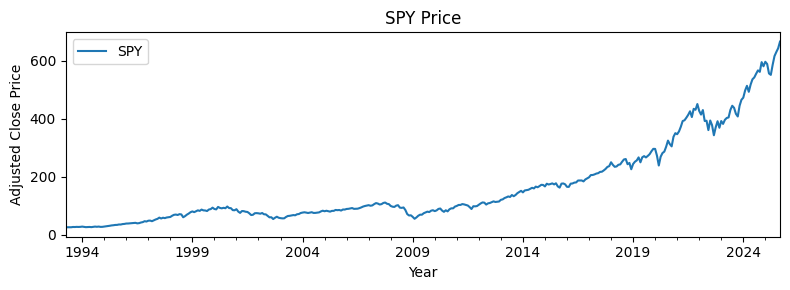

In [9]:
price_change = round((df['SPY'].iloc[-1] - df['SPY'].iloc[0]) / df['SPY'].iloc[0])*100
print (f'Percent Change from April 1993 - September 2025:  {price_change}%')

df[['SPY']].plot(figsize=(8,3))
plt.title('SPY Price')
plt.xlabel('Year') 
plt.ylabel('Adjusted Close Price')
plt.tight_layout()
plt.show()

Percent Change from April 1993 - September 2025:  300%


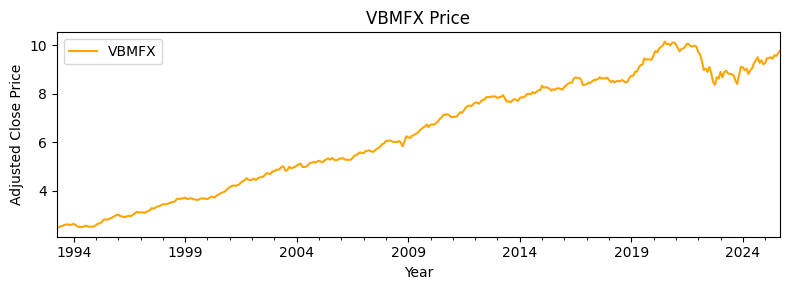

In [10]:
price_change = round((df['VBMFX'].iloc[-1] - df['VBMFX'].iloc[0]) / df['VBMFX'].iloc[0])*100
print (f'Percent Change from April 1993 - September 2025:  {price_change}%')

df[['VBMFX']].plot(figsize=(8,3),color="orange")
plt.title('VBMFX Price')
plt.xlabel('Year') 
plt.ylabel('Adjusted Close Price')
plt.tight_layout()
plt.show()



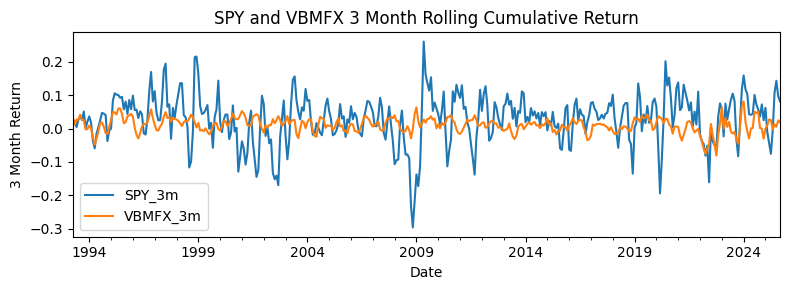

In [11]:
df[['SPY_3m','VBMFX_3m']].plot(figsize=(8,3))
plt.title('SPY and VBMFX 3 Month Rolling Cumulative Return')
plt.xlabel('Date') 
plt.ylabel('3 Month Return')
plt.tight_layout()
plt.show()